In [4]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__58_Arduino_28_PERFECT_DOC_BREED_aligned_BEHAVIOR_SIMILARITY_SEGREGATION_CENTROIDE_BEST experiment_centroid_links_mutated-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [6]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links','mutated']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,mutated
0,1,1.5,1,10,0.05,0,2.636364,2.333333,0.079167,0.000000,0.375417,0.0875,0.000000,0.000000,25,0
1,11,1.5,1,20,0.05,0,2.610390,3.666667,0.000000,0.000000,0.329167,0.0125,0.000000,0.000000,14,0
2,2,1.5,1,10,0.05,0,2.844156,3.333333,0.000000,0.000000,0.243750,0.0875,0.000000,0.000000,14,0
3,4,1.5,1,10,0.05,0,2.662338,2.666667,0.041667,0.000000,0.397917,0.0250,0.000000,0.000000,20,7
4,8,1.5,1,10,0.05,0,2.909091,3.333333,0.037500,0.000000,0.374286,0.1375,0.000000,0.000000,20,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,324,5.5,5,40,0.15,86,2.866667,2.885714,0.733834,1.531646,0.665625,21.0000,-0.251808,-0.081754,1480,7
29480,324,5.5,5,40,0.15,87,3.133333,2.771429,0.734091,1.531329,0.665787,20.9875,-0.501808,0.055746,1481,7
29481,324,5.5,5,40,0.15,88,2.755556,2.914286,0.734091,1.531329,0.665787,20.9875,-0.714308,-0.006754,1481,7
29482,324,5.5,5,40,0.15,89,2.844444,2.714286,0.734091,1.531329,0.665787,20.9875,-0.676808,-0.269254,1481,7


In [7]:
df4.groupby(['mutated','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean,
       })

mood_clients  mood_providers  cluster_coef     paths  closeness  \
mutated step                                                                    
0       0         2.737637        1.516269      0.228036  0.000000   0.316794   
        1         2.015276        1.821948      0.303654  0.374874   0.300801   
        2         2.538492        2.212889      0.340831  0.642030   0.306036   
        3         2.387641        1.806201      0.362061  0.854756   0.304209   
        4         2.555717        1.895295      0.375115  0.792399   0.314095   
...                    ...             ...           ...       ...        ...   
7       86        3.046424        2.794808      0.509188  0.893141   0.440757   
        87        3.252031        2.988843      0.510004  0.907377   0.441760   
        88        3.086076        2.781582      0.510900  0.905849   0.442689   
        89        3.084094        2.830598      0.512238  0.915858   0.443762   
        90        3.215013        2.945561      0.513415  0.914352   0.445022   

              betweenness  centroid-x  centroid-y  
mutated step                                       
0       0       59.987616    0.000000    0.000000  
        1       62.432407    0.023072    0.175082  
        2       65.933565    0.024355    0.173395  
        3       67.540162    0.007094    0.177046  
        4       64.871991    0.007770    0.184214  
...                   ...         ...         ...  
7       86      43.634954   -0.107255   -0.169444  
        87      43.586169   -0.111653   -0.163310  
        88      43.466782   -0.112001   -0.170312  
        89      43.340741   -0.102278   -0.174421  
        90      43.104167   -0.100542   -0.163599  

[182 rows x 8 columns]

In [8]:
df_move=df4.groupby(['mutated','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  closeness  \
mutated step                                                                    
0       0         2.737637        1.516269      0.228036  0.000000   0.316794   
        1         2.015276        1.821948      0.303654  0.374874   0.300801   
        2         2.538492        2.212889      0.340831  0.642030   0.306036   
        3         2.387641        1.806201      0.362061  0.854756   0.304209   
        4         2.555717        1.895295      0.375115  0.792399   0.314095   
...                    ...             ...           ...       ...        ...   
7       86        3.046424        2.794808      0.509188  0.893141   0.440757   
        87        3.252031        2.988843      0.510004  0.907377   0.441760   
        88        3.086076        2.781582      0.510900  0.905849   0.442689   
        89        3.084094        2.830598      0.512238  0.915858   0.443762   
        90        3.215013        2.945561      0.513415  0.914352   0.445022   

              betweenness  centroid-x  centroid-y       links  
mutated step                                                   
0       0       59.987616    0.000000    0.000000   80.814815  
        1       62.432407    0.023072    0.175082  109.759259  
        2       65.933565    0.024355    0.173395  126.166667  
        3       67.540162    0.007094    0.177046  141.842593  
        4       64.871991    0.007770    0.184214  155.425926  
...                   ...         ...         ...         ...  
7       86      43.634954   -0.107255   -0.169444  527.314815  
        87      43.586169   -0.111653   -0.163310  530.490741  
        88      43.466782   -0.112001   -0.170312  533.513889  
        89      43.340741   -0.102278   -0.174421  536.379630  
        90      43.104167   -0.100542   -0.163599  539.277778  

[182 rows x 9 columns]

In [9]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

/tmp/ipykernel_301048/1797470465.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


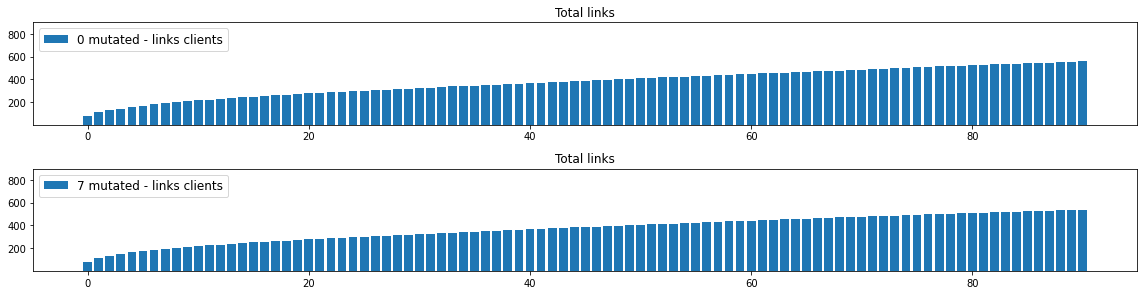

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [ 3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['links'], label='{} mutated - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

/tmp/ipykernel_301048/3160618727.py:14: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


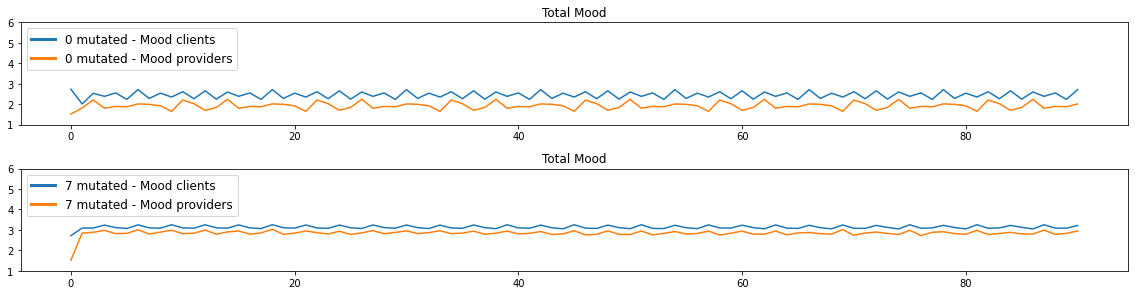

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['mood_clients'], label='{} mutated - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['mood_providers'], label='{} mutated - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,6)
plt.show()



/tmp/ipykernel_301048/9678109.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


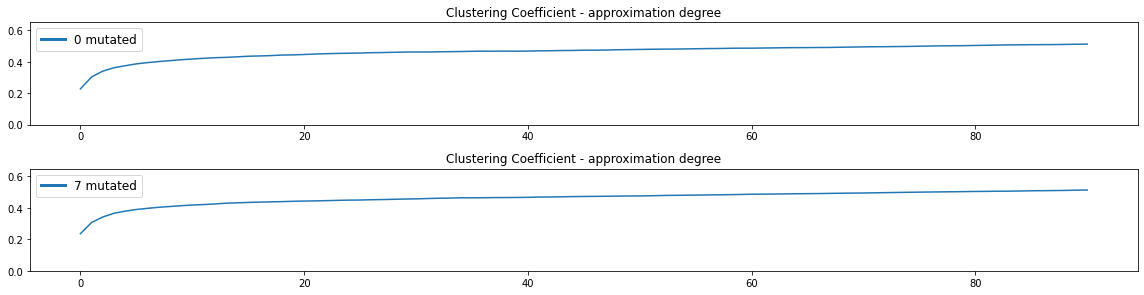

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['cluster_coef'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



/tmp/ipykernel_301048/268230891.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


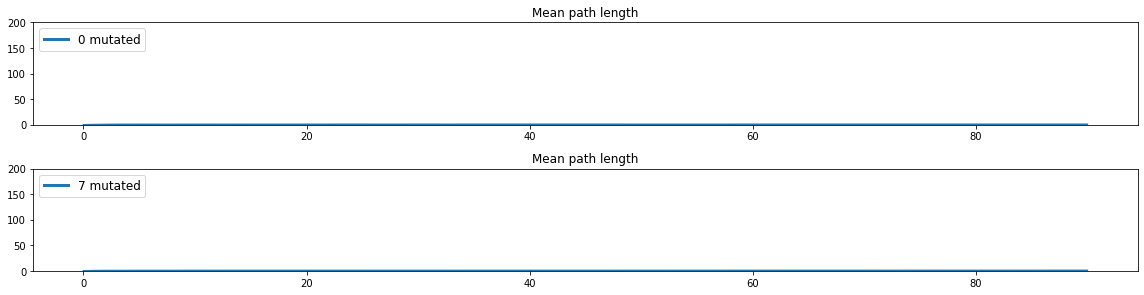

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['paths'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



/tmp/ipykernel_301048/1661058937.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


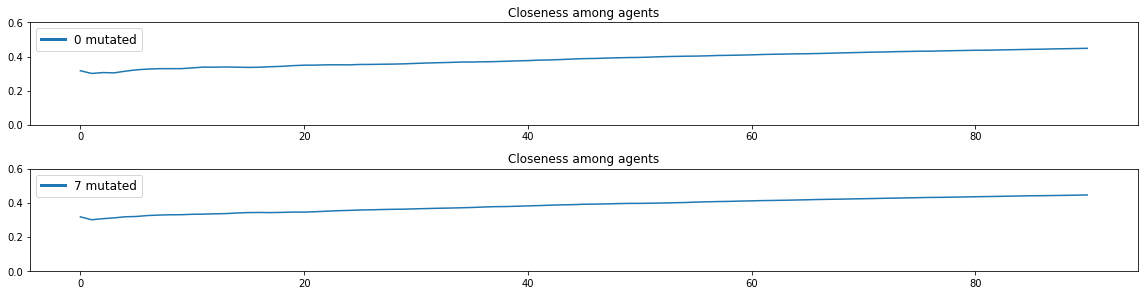

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['closeness'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



/tmp/ipykernel_301048/2187882032.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


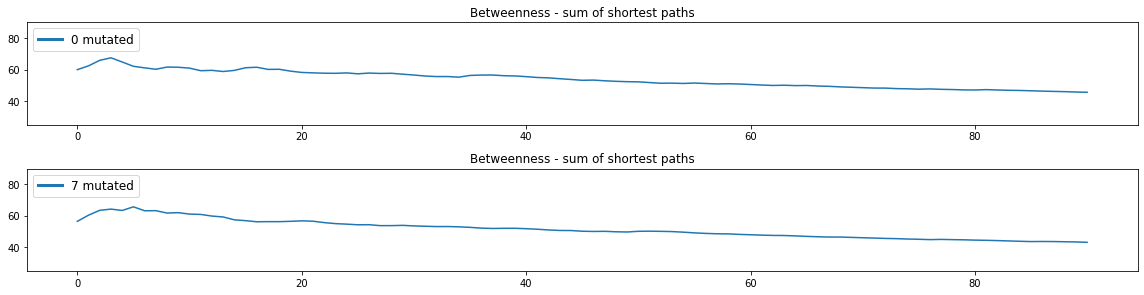

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['betweenness'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [16]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['mutated']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['mutated']==5].mean()

In [17]:
df_move.reset_index().loc[df_move.reset_index()['mutated']==1]

,mutated,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood


In [18]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [19]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-32.837,0.0
1,mood_providers,-36.9009,0.0
2,cluster_coef,0.1367,0.8914
3,paths,6.4413,0.0
4,closeness,-0.0449,0.9643
5,betweenness,2.9259,0.0039
6,centroid-x,22.9826,0.0
7,centroid-y,48.6246,0.0
8,links,0.2255,0.8218
9,total_mood,-41.795,0.0


In [20]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,1078.2657,0.0
1,mood_providers,1361.6781,0.0
2,cluster_coef,0.0187,0.8914
3,paths,41.4898,0.0
4,closeness,0.002,0.9643
5,betweenness,8.5607,0.0039
6,centroid-x,528.1997,0.0
7,centroid-y,2364.3554,0.0
8,links,0.0508,0.8218
9,total_mood,1746.8181,0.0


In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f','links.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.6772
mood_providers    0.0627
cluster_coef      0.7953
paths             0.7506
closeness         0.9418
betweenness       0.3340
total_mood        0.1807
centroid-x       -0.0397
centroid-y       -0.5907
links             0.9817
dtype: float64

In [ ]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6308
mood_providers   -0.3526
cluster_coef      0.7808
paths            -0.6039
closeness         0.9847
betweenness       0.8675
total_mood       -0.1331
centroid-x        0.1011
centroid-y       -0.0134
dtype: float64

In [ ]:
df_move.reset_index()

,mutated,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,0,0,2.3656,2.5525,0.2357,0.0000,0.3223,54.0324,0.0000,0.0000,81.0926,4.9181
1,0,1,1.7358,3.3657,0.3068,0.3809,0.3097,57.7988,0.0547,-0.1624,109.3611,5.1015
2,0,2,2.1361,3.6914,0.3463,0.4899,0.3248,58.5600,0.0464,-0.1601,128.3056,5.8275
3,0,3,2.0776,4.1304,0.3669,0.6236,0.3231,60.9772,0.0570,-0.1640,143.4815,6.2080
4,0,4,2.1751,2.6782,0.3813,0.5838,0.3303,59.6241,0.0659,-0.1871,155.9907,4.8534
...,...,...,...,...,...,...,...,...,...,...,...,...
177,7,86,2.6130,6.5841,0.4903,0.9033,0.3900,45.5718,-0.0922,0.0865,341.4444,9.1971
178,7,87,2.7875,6.7103,0.4909,0.9010,0.3908,45.4920,-0.0918,0.0816,343.0741,9.4977
179,7,88,2.6208,6.4749,0.4915,0.8979,0.3915,45.4014,-0.0955,0.0883,344.7315,9.0957
180,7,89,2.6467,6.5482,0.4921,0.8945,0.3922,45.3075,-0.0947,0.0817,346.3843,9.1949


/tmp/ipykernel_282669/2268505542.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


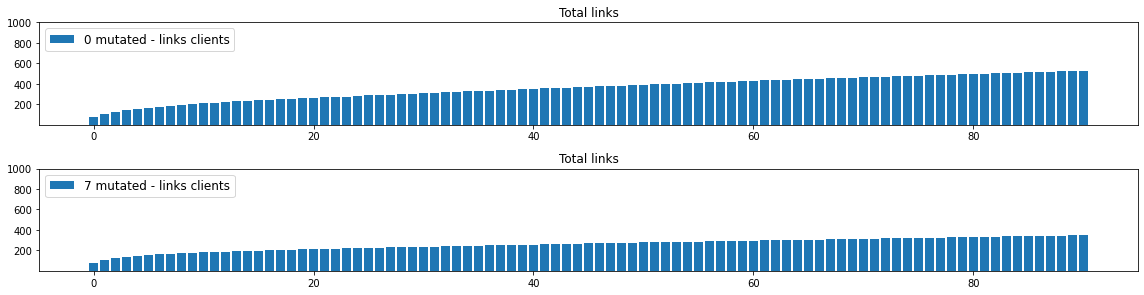

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['links'], label='{} mutated - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

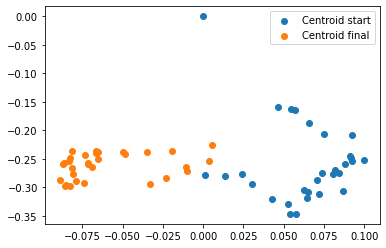

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

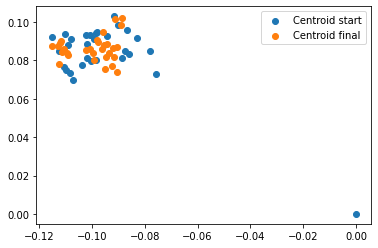

In [ ]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [ ]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

lag=7


/tmp/ipykernel_282669/1420049761.py:47: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


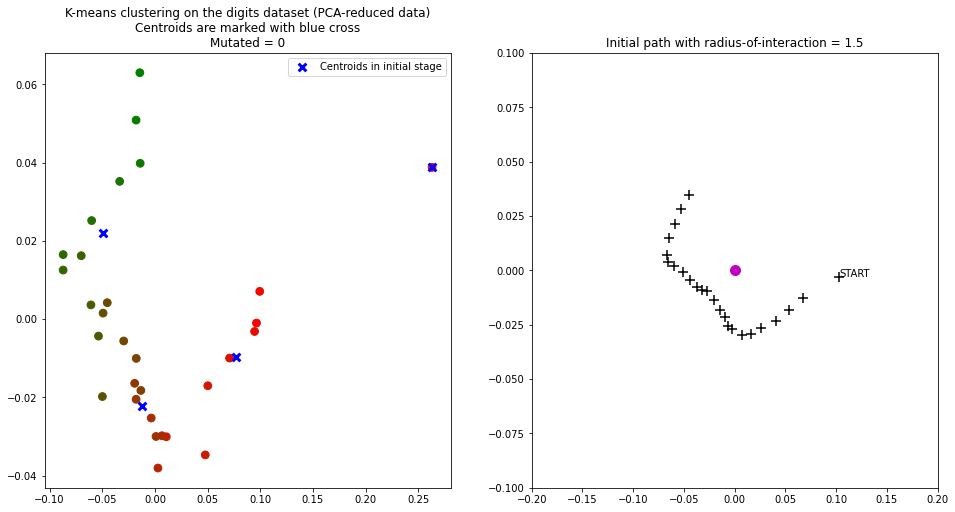

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 0"
)
plt.legend()



plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)

plt.scatter(0,0,marker='o',s=100,color='m')


plt.show()

In [ ]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

KeyError: 'movement-steps'

/tmp/ipykernel_282669/1087712571.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


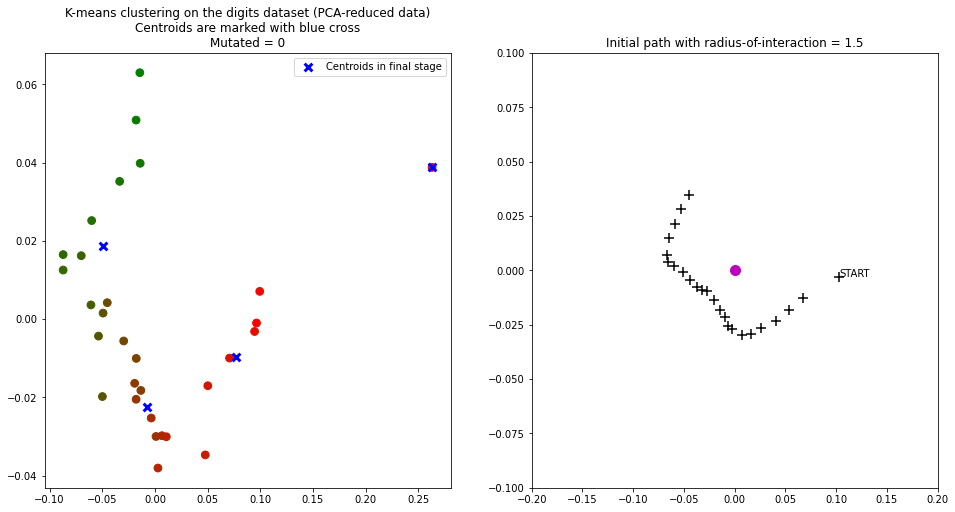

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 0"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_282669/4003934285.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


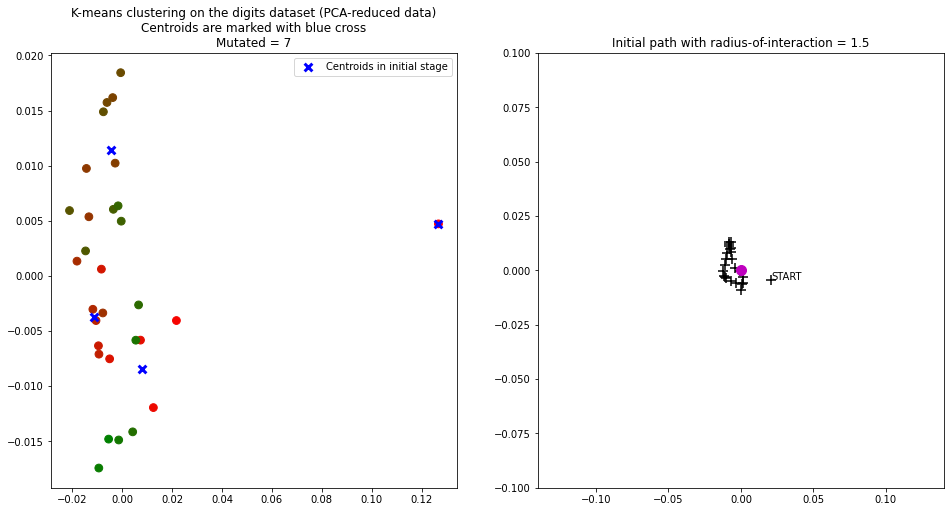

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 7"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.14,0.14)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_282669/332499640.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


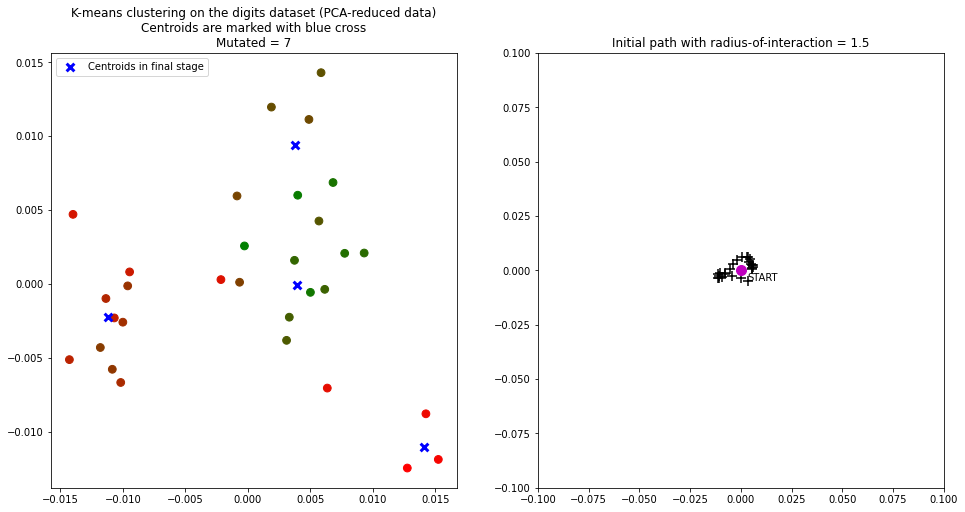

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 7"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()